In [9]:
# Importar librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Configuración de rutas
IMAGE_DIR = "..\lsb_data\imagenes"  # Carpeta con las imágenes
IMAGE_OUT_DIR = "..\lsb_data\imagenes_proc"
CSV_PATH = "lsb_data\metadata\Atkinson_Walmsley_class.csv"  # Ruta al archivo CSV



# EDA

In [9]:
import pandas as pd


metadata = pd.read_csv(CSV_PATH)  # Cambia el separador si es diferente

metadata.drop(columns=['Unnamed: 0'], inplace=True)

print(metadata.head())
print(metadata.info())

     ID  Conf   Feat      RAdeg      DEdeg  zphot  r'mag  Mstar  g'-r' R/B  \
0  W1-2     4  L;A;F  30.690147 -11.165118  0.147 -22.38  11.06  0.623   R   
1  W1-3     1      -  30.201271 -11.144945  0.178 -23.43  11.24  0.413   B   
2  W1-4     0      -  30.391056 -11.107487  0.182 -23.71  11.36  0.414   B   
3  W1-7     4  L;S;A  30.196264 -11.033447  0.120 -22.10  10.95  0.623   R   
4  W1-8     0      -  30.493235 -11.019429  0.113 -21.76  10.80  0.616   R   

         img_name  class  
0  W1-2_color.jpg    1.0  
1  W1-3_color.jpg    0.0  
2  W1-4_color.jpg    0.0  
3  W1-7_color.jpg    1.0  
4  W1-8_color.jpg    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1760 non-null   object 
 1   Conf      1760 non-null   int64  
 2   Feat      1760 non-null   object 
 3   RAdeg     1760 non-null   float64
 4   DEdeg     1760 non-null

In [10]:
print(metadata.describe(include="all"))

            ID         Conf  Feat        RAdeg        DEdeg        zphot  \
count     1760  1760.000000  1760  1760.000000  1760.000000  1760.000000   
unique    1760          NaN    36          NaN          NaN          NaN   
top     W4-431          NaN     -          NaN          NaN          NaN   
freq         1          NaN  1463          NaN          NaN          NaN   
mean       NaN     0.905682   NaN   166.329099    19.368272     0.125057   
std        NaN     1.407028   NaN   105.741734    29.656129     0.036403   
min        NaN     0.000000   NaN    30.196264   -11.228167     0.041000   
25%        NaN     0.000000   NaN    36.402993    -6.879644     0.093000   
50%        NaN     0.000000   NaN   210.773483     1.025838     0.123000   
75%        NaN     2.000000   NaN   217.796947    54.408779     0.151000   
max        NaN     4.000000   NaN   335.701508    57.796677     0.198000   

              r'mag        Mstar        g'-r'   R/B          img_name  \
count   1760.0

In [11]:
# Conteo de valores nulos
print(metadata.isnull().sum())

# Porcentaje de valores nulos
print(metadata.isnull().mean() * 100)


ID            0
Conf          0
Feat          0
RAdeg         0
DEdeg         0
zphot         0
r'mag         0
Mstar         0
g'-r'         0
R/B           0
img_name      0
class       136
dtype: int64
ID          0.000000
Conf        0.000000
Feat        0.000000
RAdeg       0.000000
DEdeg       0.000000
zphot       0.000000
r'mag       0.000000
Mstar       0.000000
g'-r'       0.000000
R/B         0.000000
img_name    0.000000
class       7.727273
dtype: float64


              Conf        RAdeg        DEdeg        zphot        r'mag  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000   
mean      0.905682   166.329099    19.368272     0.125057   -22.152852   
std       1.407028   105.741734    29.656129     0.036403     0.815681   
min       0.000000    30.196264   -11.228167     0.041000   -24.060000   
25%       0.000000    36.402993    -6.879644     0.093000   -22.790000   
50%       0.000000   210.773483     1.025838     0.123000   -22.220000   
75%       2.000000   217.796947    54.408779     0.151000   -21.547500   
max       4.000000   335.701508    57.796677     0.198000   -19.300000   

             Mstar        g'-r'  
count  1760.000000  1760.000000  
mean     10.836756     0.504537  
std       0.387129     0.128446  
min       9.400000     0.053000  
25%      10.550000     0.407750  
50%      10.880000     0.552500  
75%      11.140000     0.610000  
max      11.640000     0.708000  


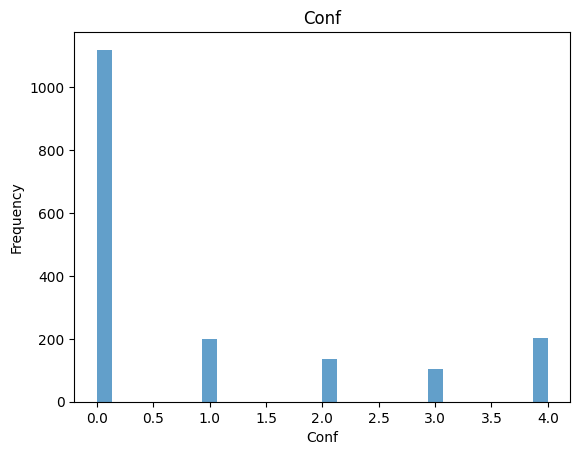

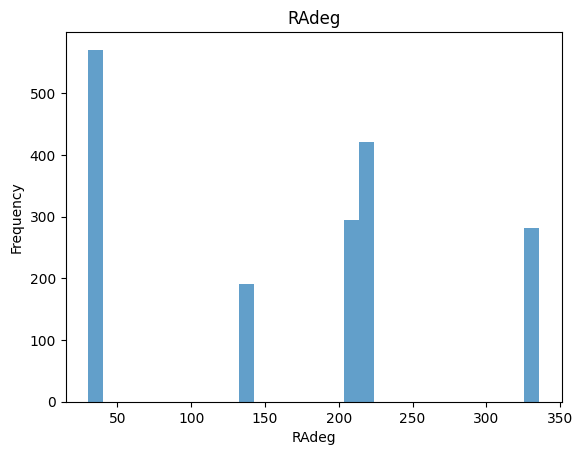

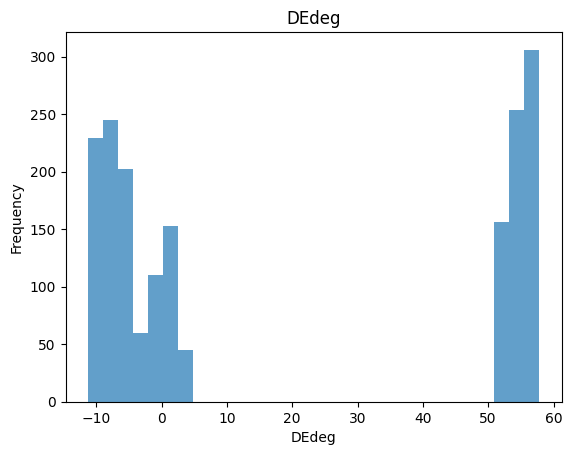

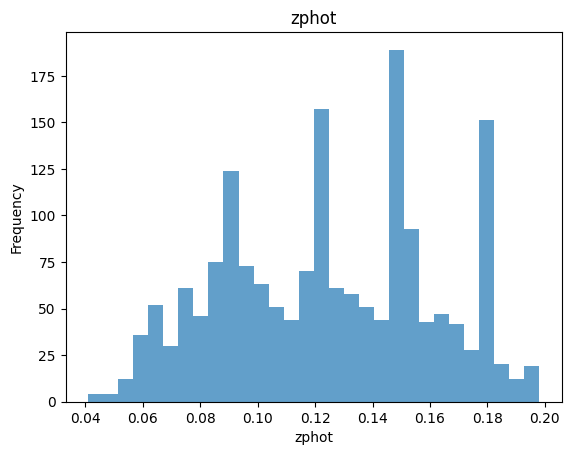

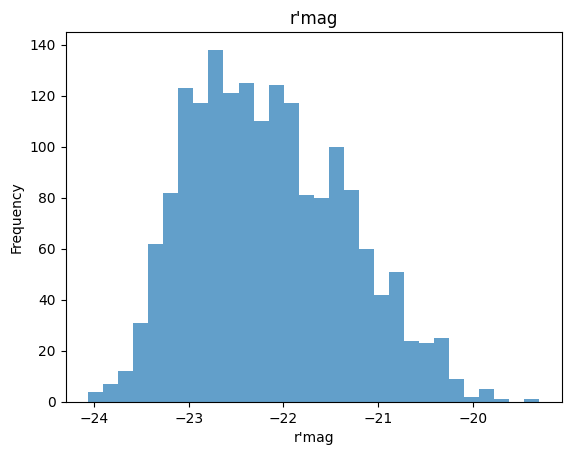

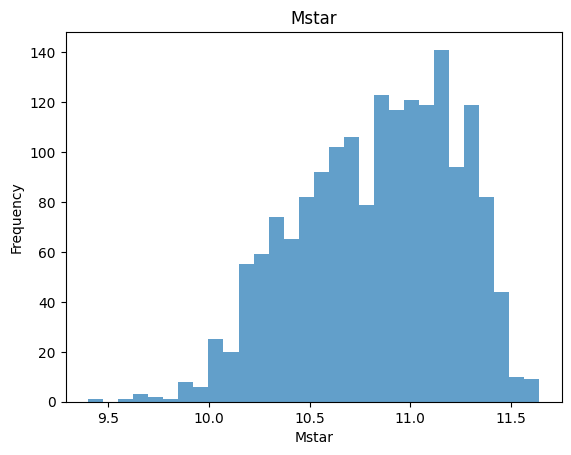

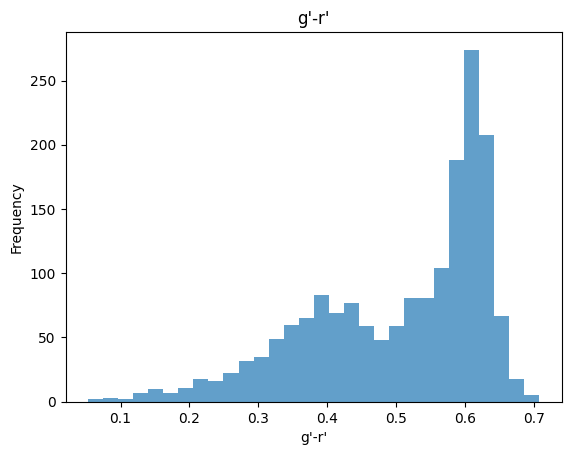

In [12]:
# Seleccionar columnas numéricas
numeric_cols = ['Conf', 'RAdeg', 'DEdeg', 'zphot', "r'mag", 'Mstar', "g'-r'"]

# Resumen estadístico de las columnas numéricas
print(metadata[numeric_cols].describe())

# Visualización de distribuciones
import matplotlib.pyplot as plt

for col in numeric_cols:
    metadata[col].plot(kind='hist', bins=30, title=col, alpha=0.7)
    plt.xlabel(col)
    plt.show()


Frecuencia de R/B:
 R/B
R    983
B    777
Name: count, dtype: int64
Frecuencia de Feat:
 Feat
-        1463
A          63
S          43
M          42
F          26
L          19
H          16
A;M        11
A;F         7
S;L         7
L;F         7
A;L         5
S;A         5
S;M         4
F;M         4
L;H         4
M;A         3
H;L         3
F;H         2
A;S;M       2
L;A         2
S;F         2
A;S         2
L;S         2
F;A         2
F;S         2
L;H;F       2
H;F         2
L;S;A       1
L;A;F       1
L;M         1
L;A;M       1
S;L;F       1
L;F;M       1
S;H         1
A;L;H       1
Name: count, dtype: int64


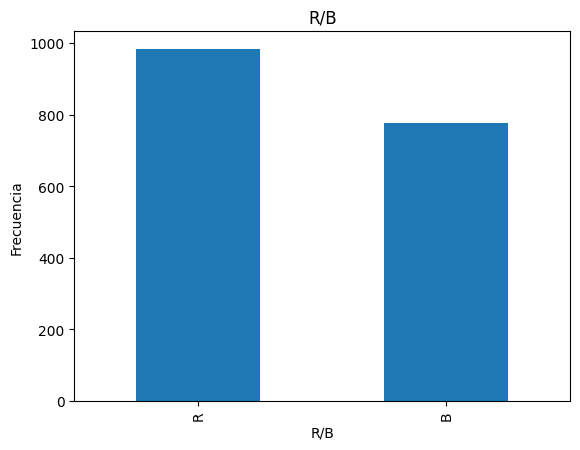

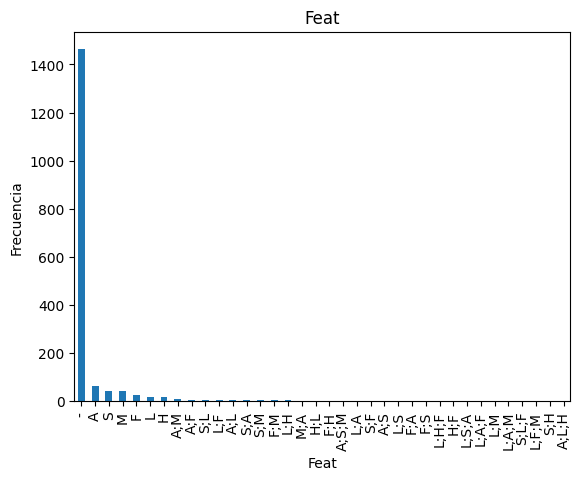

In [13]:
# Frecuencias de valores categóricos
categorical_cols = ['R/B', 'Feat']
for col in categorical_cols:
    print(f"Frecuencia de {col}:\n", metadata[col].value_counts())

# Visualización de frecuencias
for col in categorical_cols:
    metadata[col].value_counts().plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


           Conf     RAdeg     DEdeg     zphot     r'mag     Mstar     g'-r'
Conf   1.000000 -0.082670 -0.049014  0.050940 -0.066686  0.107638  0.137582
RAdeg -0.082670  1.000000  0.473532 -0.056097  0.037308 -0.004737  0.071679
DEdeg -0.049014  0.473532  1.000000 -0.056175  0.063241 -0.039336  0.037322
zphot  0.050940 -0.056097 -0.056175  1.000000 -0.936679  0.876464  0.234695
r'mag -0.066686  0.037308  0.063241 -0.936679  1.000000 -0.932892 -0.242739
Mstar  0.107638 -0.004737 -0.039336  0.876464 -0.932892  1.000000  0.575743
g'-r'  0.137582  0.071679  0.037322  0.234695 -0.242739  0.575743  1.000000


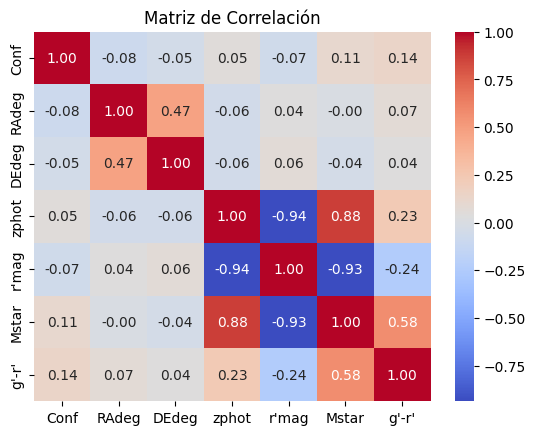

In [14]:
# Matriz de correlación
correlation_matrix = metadata[numeric_cols].corr()
print(correlation_matrix)

# Visualización con mapa de calor
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


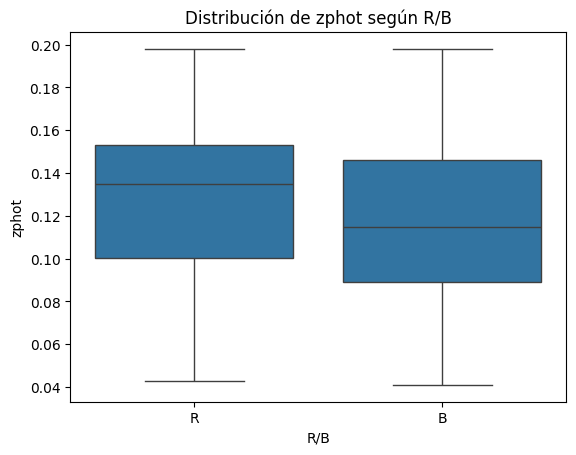

In [15]:
# Boxplot para cada categoría en 'R/B' frente a 'zphot'
sns.boxplot(x='R/B', y='zphot', data=metadata)
plt.title("Distribución de zphot según R/B")
plt.show()


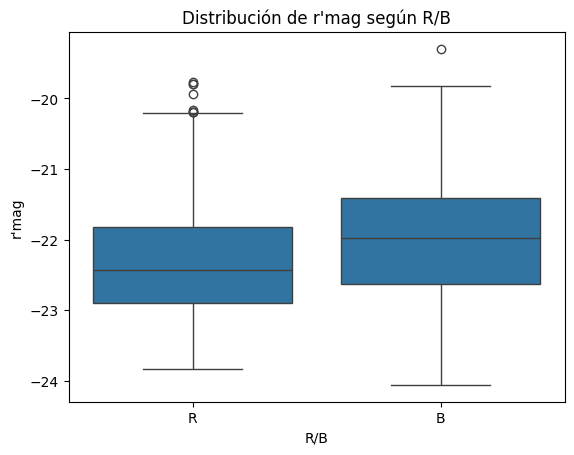

In [16]:
sns.boxplot(x='R/B', y="r'mag", data=metadata)
plt.title("Distribución de r'mag según R/B")
plt.show()

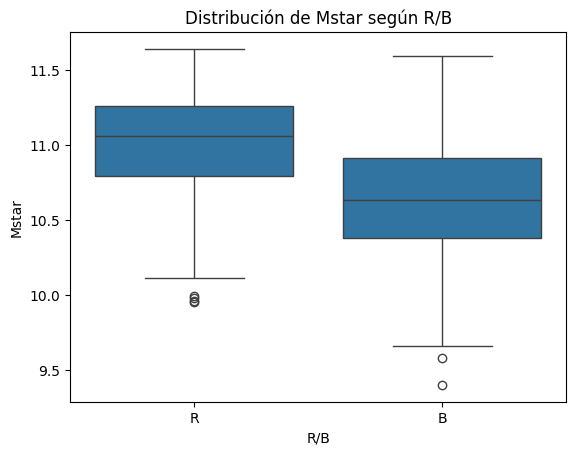

In [17]:
sns.boxplot(x='R/B', y='Mstar', data=metadata)
plt.title("Distribución de Mstar según R/B")
plt.show()

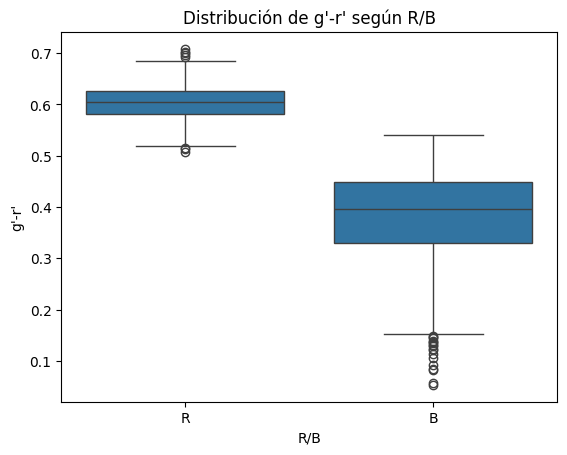

In [18]:
sns.boxplot(x='R/B', y="g'-r'", data=metadata)
plt.title("Distribución de g'-r' según R/B")
plt.show()

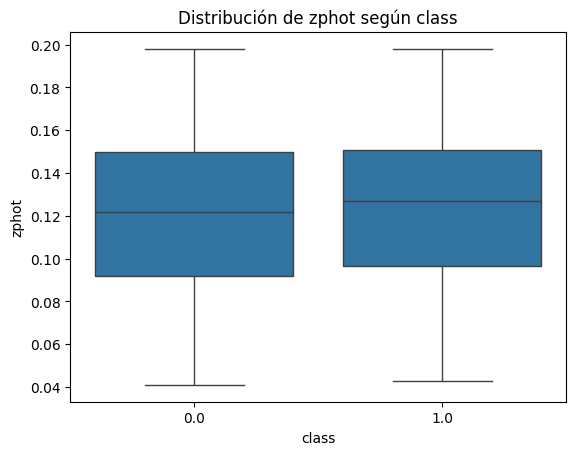

In [19]:
sns.boxplot(x='class', y='zphot', data=metadata)
plt.title("Distribución de zphot según class")
plt.show()


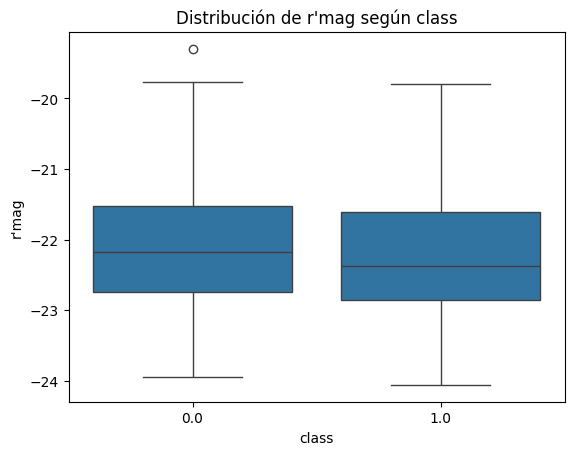

In [20]:
sns.boxplot(x='class', y="r'mag", data=metadata)
plt.title("Distribución de r'mag según class")
plt.show()


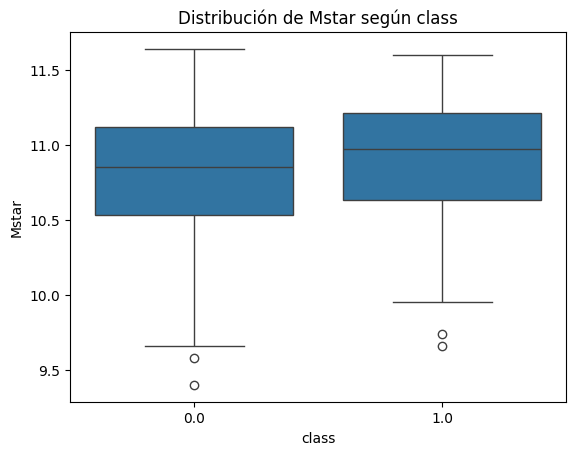

In [21]:
sns.boxplot(x='class', y='Mstar', data=metadata)
plt.title("Distribución de Mstar según class")
plt.show()


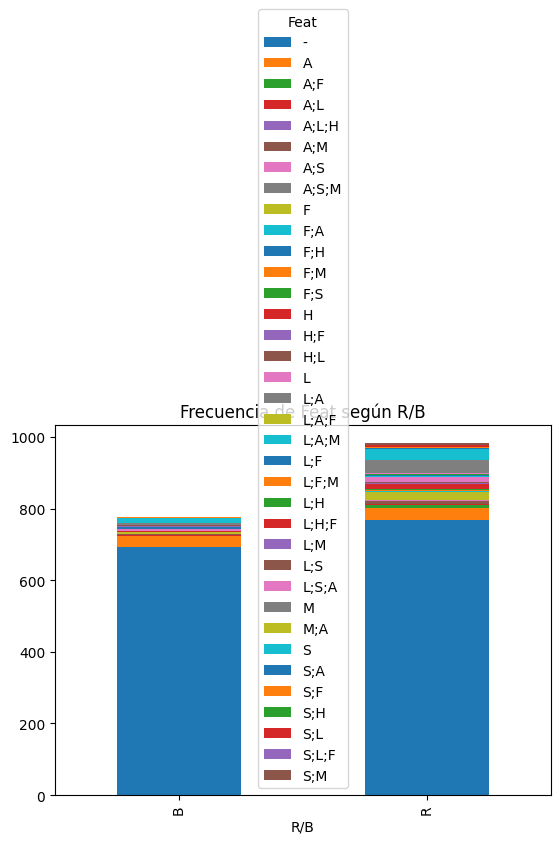

In [22]:
feat_counts = metadata.groupby('R/B')['Feat'].value_counts().unstack()
feat_counts.plot(kind='bar', stacked=True)
plt.title("Frecuencia de Feat según R/B")
plt.show()


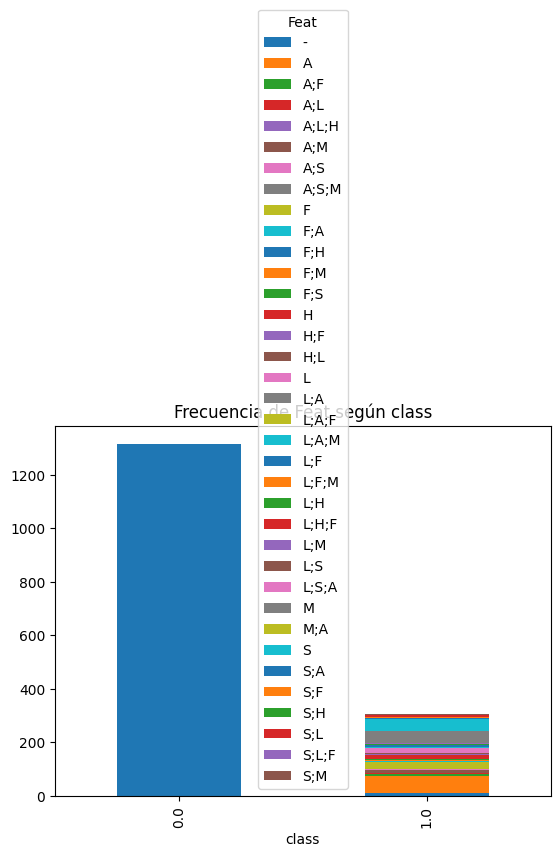

In [23]:
feat_counts_class = metadata.groupby('class')['Feat'].value_counts().unstack()
feat_counts_class.plot(kind='bar', stacked=True)
plt.title("Frecuencia de Feat según class")
plt.show()

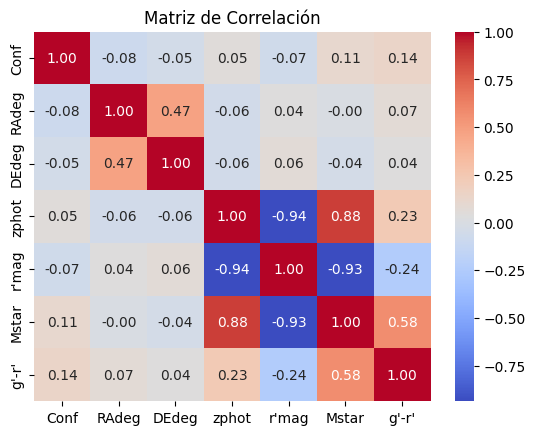

In [24]:
numeric_cols = ['Conf', 'RAdeg', 'DEdeg', 'zphot', "r'mag", 'Mstar', "g'-r'"]
correlation_matrix = metadata[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


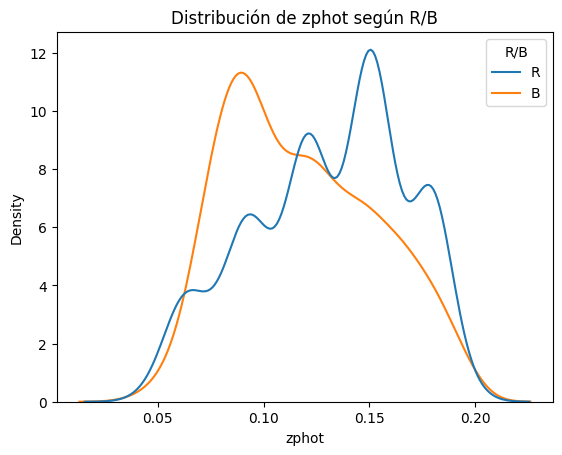

In [ ]:
sns.kdeplot(data=metadata, x='zphot', hue='R/B', common_norm=False, )
plt.title("Distribución de zphot según R/B")
plt.show()


  - La densidad de `zphot` para objetos rojos (`R`) se concentra en valores más altos, indicando que los objetos rojos suelen estar más distantes.
  - Los objetos azules (`B`) tienen su densidad principalmente en valores más bajos de `zphot`, lo que sugiere que están más cercanos.
  - Aunque existe cierta superposición entre las distribuciones de `R` y `B`, las diferencias son notables, especialmente en las colas de las distribuciones.
  - La distribución de `zphot` para `R` parece más sesgada hacia valores altos, mientras que para `B` tiene una caída más rápida después del pico.


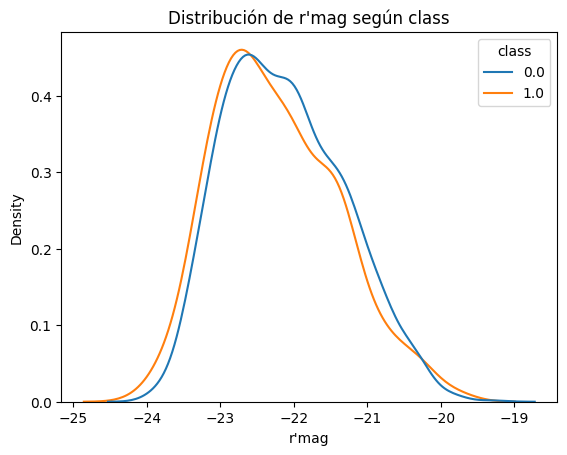

In [26]:
sns.kdeplot(data=metadata, x="r'mag", hue='class', common_norm=False)
plt.title("Distribución de r'mag según class")
plt.show()


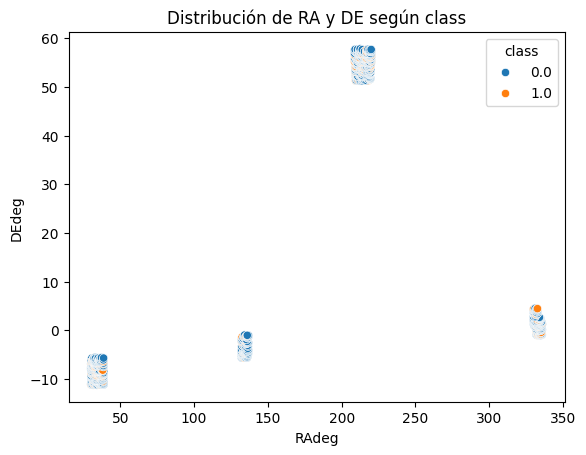

In [27]:
# Distribución espacial de RA y Dec, coloreando por class
sns.scatterplot(data=metadata, x='RAdeg', y='DEdeg', hue='class')
plt.title("Distribución de RA y DE según class")
plt.show()


# EDA Imagenes

In [4]:
import os
from PIL import Image

# Ruta de la carpeta con imágenes
image_dir = IMAGE_DIR

# Inspeccionar las propiedades básicas
image_properties = []
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    with Image.open(img_path) as img:
        image_properties.append({
            'name': img_name,
            'format': img.format,
            'mode': img.mode,
            'size': img.size,  # (width, height)
        })

# Crear DataFrame con las propiedades
import pandas as pd
image_df = pd.DataFrame(image_properties)
print(image_df.head())

# Resumen de formatos y dimensiones
print(image_df['format'].value_counts())
print(image_df['size'].value_counts())


               name format mode        size
0  W1-100_color.jpg   JPEG  RGB  (424, 424)
1  W1-101_color.jpg   JPEG  RGB  (424, 424)
2  W1-102_color.jpg   JPEG  RGB  (424, 424)
3  W1-103_color.jpg   JPEG  RGB  (424, 424)
4  W1-104_color.jpg   JPEG  RGB  (424, 424)
format
JPEG    1760
Name: count, dtype: int64
size
(424, 424)    1760
Name: count, dtype: int64


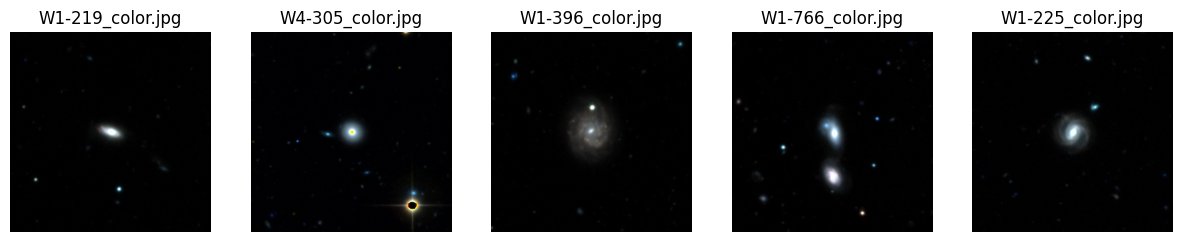

In [5]:
import matplotlib.pyplot as plt
import random

# Seleccionar imágenes aleatorias
sample_images = random.sample(os.listdir(image_dir), 5)

# Mostrar las imágenes
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.show()


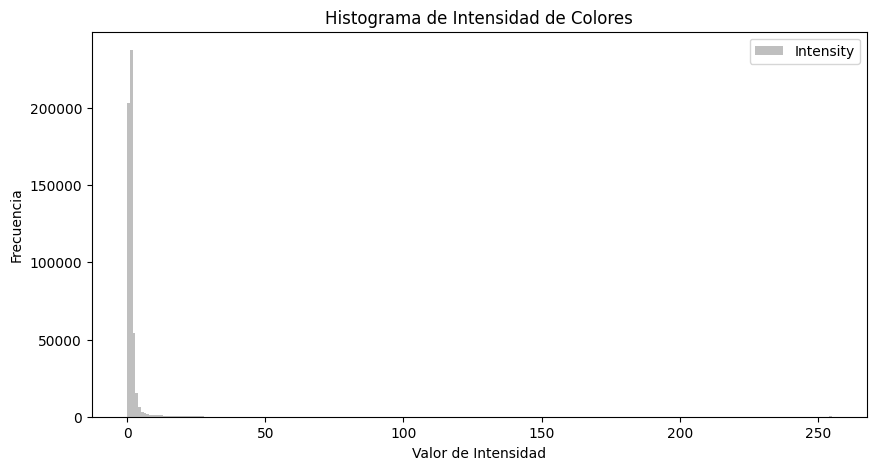

In [6]:
import numpy as np

# Función para calcular histograma de colores
def plot_color_histogram(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    plt.figure(figsize=(10, 5))
    plt.hist(img_array.ravel(), bins=256, color='gray', alpha=0.5, label='Intensity')
    plt.xlabel("Valor de Intensidad")
    plt.ylabel("Frecuencia")
    plt.title("Histograma de Intensidad de Colores")
    plt.legend()
    plt.show()

# Analizar una imagen de ejemplo
example_image = os.path.join(image_dir, sample_images[0])
plot_color_histogram(example_image)


In [7]:
# Comparar imágenes con la metadata
metadata_images = set(metadata['img_name'])
available_images = set(os.listdir(image_dir))

# Imágenes faltantes en la metadata
missing_in_metadata = available_images - metadata_images
print(f"Imágenes no listadas en la metadata: {len(missing_in_metadata)}")

# Imágenes faltantes en el directorio
missing_in_folder = metadata_images - available_images
print(f"Imágenes listadas en la metadata pero no en el directorio: {len(missing_in_folder)}")


NameError: name 'metadata' is not defined

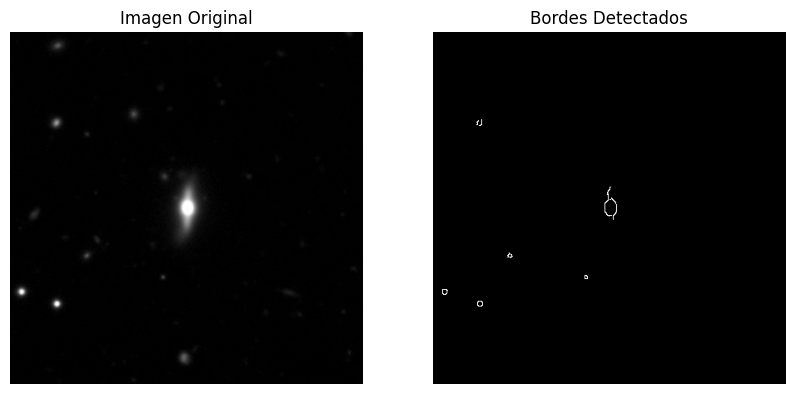

In [47]:
import cv2

# Cargar una imagen en escala de grises
img_path = os.path.join(image_dir, sample_images[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Aplicar detección de bordes
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Mostrar la imagen original y los bordes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Bordes Detectados")
plt.axis('off')
plt.show()


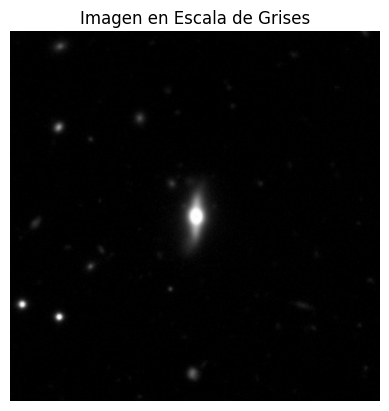

In [57]:
import cv2
import matplotlib.pyplot as plt

def load_and_prepare_image(image_path):
    """
    Carga una imagen desde el path y la convierte a escala de grises (uint8) para usar con CLAHE.
    Args:
        image_path (str): Ruta de la imagen.
    Returns:
        np.array: Imagen en escala de grises (uint8).
    """
    # Leer la imagen desde el path
    img = cv2.imread(image_path)
    
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {image_path}")
    
    # Convertir a escala de grises
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img_gray


image_gray = load_and_prepare_image(example_image)

# Mostrar la imagen en escala de grises
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title("Imagen en Escala de Grises")
plt.show()


In [56]:
example_image

'lsb_data\\imagenes\\W3-525_color.jpg'

In [60]:
import cv2

# Ruta de la imagen
image_path = example_image

# Cargar la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print(f"No se pudo cargar la imagen: {image_path}")
else:
    print(f"Tipo de dato: {image.dtype}")
    print(f"Forma de la imagen: {image.shape}")


Tipo de dato: uint8
Forma de la imagen: (424, 424)


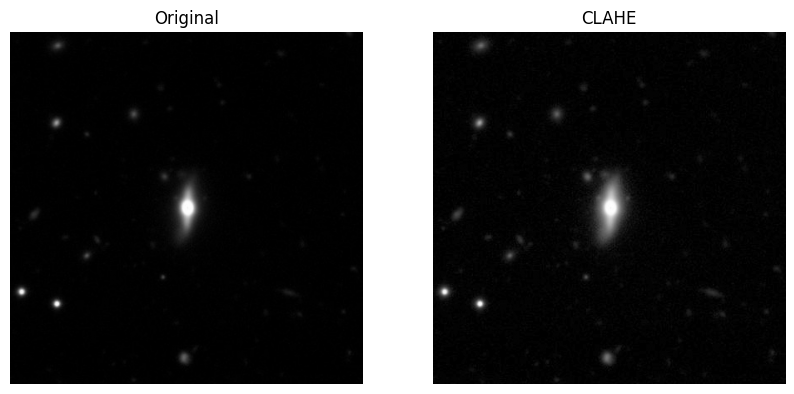

In [61]:
import cv2

def load_and_prepare_image(image_path):
    """
    Carga una imagen desde el path y la convierte a escala de grises (uint8) para usar con CLAHE.
    Args:
        image_path (str): Ruta de la imagen.
    Returns:
        np.array: Imagen en escala de grises (uint8).
    """
    # Leer la imagen desde el path
    img = cv2.imread(image_path)
    
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {image_path}")
    
    # Convertir a escala de grises
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img_gray

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Aplica CLAHE para mejorar el contraste adaptativo.
    Args:
        image (np.array): Imagen en escala de grises.
        clip_limit (float): Límite para la ecualización de contraste.
        tile_grid_size (tuple): Tamaño de la grilla para la ecualización local.
    Returns:
        np.array: Imagen procesada con CLAHE.
    """
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(image)
    return clahe_image

# Probar en una imagen

img=load_and_prepare_image(example_image)
clahe_image = apply_clahe(img)

# Mostrar antes y después
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE")
plt.axis('off')
plt.show()


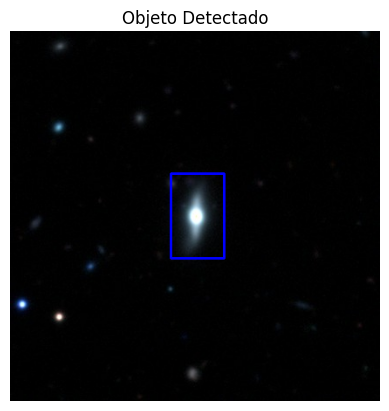

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def find_object_edges(image_path, intensity_threshold=5):
    """
    Detecta el borde del objeto en una imagen empezando desde el centro.
    Args:
        image_path (str): Ruta de la imagen.
        intensity_threshold (int): Diferencia de intensidad para detectar el borde.
    Returns:
        tuple: Coordenadas del cuadro delimitador (x, y, width, height).
    """
    # Cargar imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape

    # Calcular el centro
    center_x, center_y = width // 2, height // 2

    # Función para buscar el borde en una dirección
    def find_edge(start, end, step, fixed_coord, is_horizontal):
        for coord in range(start, end, step):
            if is_horizontal:
                pixel_value = img[fixed_coord, coord]
            else:
                pixel_value = img[coord, fixed_coord]
            if pixel_value < intensity_threshold:  # Fondo oscuro detectado
                return coord
        return end

    # Buscar bordes desde el centro hacia los extremos
    left = find_edge(center_x, 0, -1, center_y, True)      # Izquierda
    right = find_edge(center_x, width, 1, center_y, True)  # Derecha
    top = find_edge(center_y, 0, -1, center_x, False)      # Arriba
    bottom = find_edge(center_y, height, 1, center_x, False)  # Abajo

    # Calcular cuadro delimitador
    x = left
    y = top
    w = right - left
    h = bottom - top

    return x, y, w, h

# Probar con una imagen
image_path = example_image
x, y, w, h = find_object_edges(image_path)

# Cargar imagen original
img = cv2.imread(image_path)

# Dibujar el cuadro delimitador en la imagen
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Mostrar imagen con cuadro delimitador
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Objeto Detectado")
plt.show()


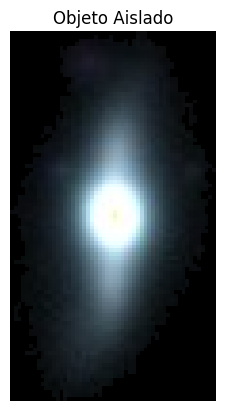

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isolate_object(image_path, intensity_threshold=10):
    """
    Aísla el objeto central en la imagen eliminando el fondo oscuro.
    Args:
        image_path (str): Ruta de la imagen.
        intensity_threshold (int): Umbral para detectar el objeto.
    Returns:
        np.array: Imagen con el objeto aislado.
    """
    # Cargar la imagen original
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para separar el objeto del fondo
    _, binary = cv2.threshold(img_gray, intensity_threshold, 255, cv2.THRESH_BINARY)

    # Encontrar contornos
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar el contorno más grande (asumiendo que es el objeto)
    largest_contour = max(contours, key=cv2.contourArea)

    # Crear una máscara con el contorno
    mask = np.zeros_like(img_gray)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Aplicar la máscara a la imagen original
    isolated_object = cv2.bitwise_and(img, img, mask=mask)

    # Opcional: Recortar la región alrededor del objeto para reducir el tamaño
    x, y, w, h = cv2.boundingRect(largest_contour)
    isolated_object = isolated_object[y:y+h, x:x+w]

    return isolated_object

# Probar con una imagen
image_path = example_image
isolated_img = isolate_object(image_path, intensity_threshold=10)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(isolated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Objeto Aislado")
plt.show()


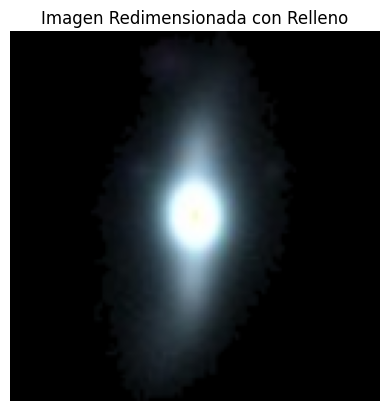

In [51]:
import cv2
import numpy as np

def resize_with_padding(image, desired_size):
    """
    Redimensiona una imagen al tamaño deseado con relleno para mantener la relación de aspecto.
    Args:
        image (np.array): Imagen cargada con OpenCV.
        desired_size (int): Tamaño deseado (asume imágenes cuadradas).
    Returns:
        np.array: Imagen redimensionada con relleno.
    """
    old_size = image.shape[:2]  # (height, width)
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # Redimensionar la imagen
    resized_image = cv2.resize(image, (new_size[1], new_size[0]))

    # Calcular el relleno
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    # Añadir relleno (relleno negro, pero puede ajustarse)
    color = [0, 0, 0]  # Negro
    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return padded_image

# Probar la función
# image_path = example_image
# image = cv2.imread(image_path)
image=isolated_img
desired_size = 128  # Tamaño deseado

if image is not None:
    resized_image = resize_with_padding(image, desired_size)

    # Mostrar la imagen redimensionada
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Imagen Redimensionada con Relleno")
    plt.show()


In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

def process_images(input_dir, output_dir, desired_size=128, intensity_threshold=10):
    """
    Procesa todas las imágenes en un directorio aplicando detección de bordes, CLAHE y padding.
    Args:
        input_dir (str): Directorio con las imágenes originales.
        output_dir (str): Directorio donde se guardarán las imágenes procesadas.
        desired_size (int): Tamaño uniforme deseado para las imágenes (cuadradas).
        intensity_threshold (int): Umbral para detectar el borde del objeto.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        
        # Cargar la imagen y convertir a escala de grises
        img = cv2.imread(img_path)
        if img is None:
            print(f"No se pudo cargar la imagen: {img_name}")
            continue
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detectar el borde del objeto y recortar
        _, binary = cv2.threshold(img_gray, intensity_threshold, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            print(f"No se encontraron contornos en la imagen: {img_name}")
            continue
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped = img_gray[y:y+h, x:x+w]

        # Aplicar CLAHE para mejorar el brillo
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_img = clahe.apply(cropped)

        # Redimensionar con padding
        old_size = clahe_img.shape[:2]  # (height, width)
        ratio = float(desired_size) / max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])
        resized = cv2.resize(clahe_img, (new_size[1], new_size[0]))
        delta_w = desired_size - new_size[1]
        delta_h = desired_size - new_size[0]
        top, bottom = delta_h // 2, delta_h - (delta_h // 2)
        left, right = delta_w // 2, delta_w - (delta_w // 2)
        padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

        # Guardar la imagen procesada
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path, padded)
        print(f"Procesada y guardada: {img_name}")



# Ejecutar el pipeline
process_images(IMAGE_DIR, IMAGE_OUT_DIR)


Procesada y guardada: W1-100_color.jpg
Procesada y guardada: W1-101_color.jpg
Procesada y guardada: W1-102_color.jpg
Procesada y guardada: W1-103_color.jpg
Procesada y guardada: W1-104_color.jpg
Procesada y guardada: W1-110_color.jpg
Procesada y guardada: W1-111_color.jpg
Procesada y guardada: W1-112_color.jpg
Procesada y guardada: W1-113_color.jpg
Procesada y guardada: W1-114_color.jpg
Procesada y guardada: W1-115_color.jpg
Procesada y guardada: W1-117_color.jpg
Procesada y guardada: W1-118_color.jpg
Procesada y guardada: W1-11_color.jpg
Procesada y guardada: W1-120_color.jpg
Procesada y guardada: W1-122_color.jpg
Procesada y guardada: W1-123_color.jpg
Procesada y guardada: W1-125_color.jpg
Procesada y guardada: W1-126_color.jpg
Procesada y guardada: W1-127_color.jpg
Procesada y guardada: W1-134_color.jpg
Procesada y guardada: W1-135_color.jpg
Procesada y guardada: W1-136_color.jpg
Procesada y guardada: W1-137_color.jpg
Procesada y guardada: W1-139_color.jpg
Procesada y guardada: W1-1

: 

In [10]:
print(os.path.abspath(IMAGE_OUT_DIR))


c:\MNA\galaxias\lsb_data\imagenes_proc


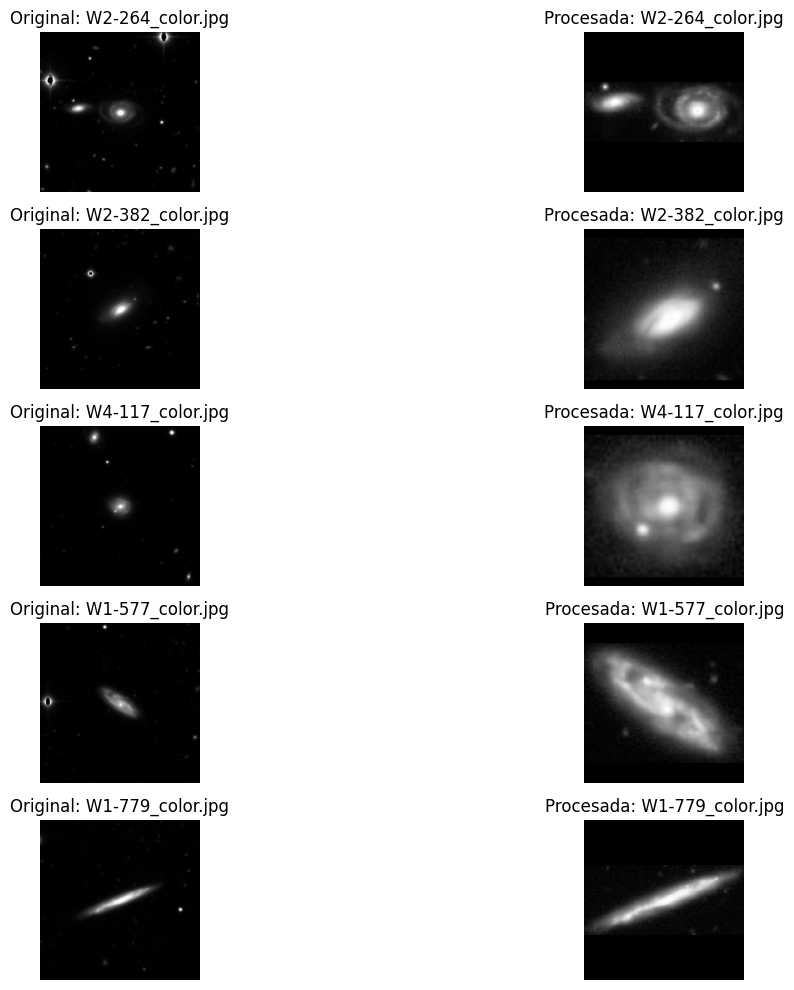

In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def display_before_after(original_dir, processed_dir, sample_size=5):
    """
    Muestra imágenes originales y preprocesadas lado a lado.
    Args:
        original_dir (str): Directorio con imágenes originales.
        processed_dir (str): Directorio con imágenes preprocesadas.
        sample_size (int): Número de imágenes a mostrar.
    """
    # Obtener lista de nombres de imágenes comunes en ambos directorios
    original_images = set(os.listdir(original_dir))
    processed_images = set(os.listdir(processed_dir))
    common_images = list(original_images.intersection(processed_images))
    
    if len(common_images) == 0:
        print("No hay imágenes comunes en ambos directorios.")
        return

    # Seleccionar imágenes al azar
    img_names = random.sample(common_images, min(sample_size, len(common_images)))

    # Mostrar imágenes
    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(img_names):
        # Cargar imágenes originales y preprocesadas
        original_path = os.path.join(original_dir, img_name)
        processed_path = os.path.join(processed_dir, img_name)

        original_img = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
        processed_img = cv2.imread(processed_path, cv2.IMREAD_GRAYSCALE)

        # Mostrar la imagen original
        plt.subplot(sample_size, 2, 2 * i + 1)
        plt.imshow(original_img, cmap='gray')
        plt.title(f"Original: {img_name}")
        plt.axis('off')

        # Mostrar la imagen preprocesada
        plt.subplot(sample_size, 2, 2 * i + 2)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Procesada: {img_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Ejecutar la función
display_before_after(IMAGE_DIR, IMAGE_OUT_DIR)


In [7]:
os.listdir(IMAGE_OUT_DIR)

['W1-100_color.jpg',
 'W1-101_color.jpg',
 'W1-102_color.jpg',
 'W1-103_color.jpg',
 'W1-104_color.jpg',
 'W1-110_color.jpg',
 'W1-111_color.jpg',
 'W1-112_color.jpg',
 'W1-113_color.jpg',
 'W1-114_color.jpg',
 'W1-115_color.jpg',
 'W1-117_color.jpg',
 'W1-118_color.jpg',
 'W1-11_color.jpg',
 'W1-120_color.jpg',
 'W1-122_color.jpg',
 'W1-123_color.jpg',
 'W1-125_color.jpg',
 'W1-126_color.jpg',
 'W1-127_color.jpg',
 'W1-134_color.jpg',
 'W1-135_color.jpg',
 'W1-136_color.jpg',
 'W1-137_color.jpg',
 'W1-139_color.jpg',
 'W1-13_color.jpg',
 'W1-140_color.jpg',
 'W1-141_color.jpg',
 'W1-142_color.jpg',
 'W1-143_color.jpg',
 'W1-145_color.jpg',
 'W1-148_color.jpg',
 'W1-149_color.jpg',
 'W1-151_color.jpg',
 'W1-152_color.jpg',
 'W1-153_color.jpg',
 'W1-154_color.jpg',
 'W1-155_color.jpg',
 'W1-156_color.jpg',
 'W1-157_color.jpg',
 'W1-159_color.jpg',
 'W1-160_color.jpg',
 'W1-164_color.jpg',
 'W1-165_color.jpg',
 'W1-166_color.jpg',
 'W1-167_color.jpg',
 'W1-168_color.jpg',
 'W1-169_color.

In [ ]:
import pandas as pd


metadata = pd.read_csv(CSV_PATH)  # Cambia el separador si es diferente

metadata.drop(columns=['Unnamed: 0'], inplace=True)

metadata.drop(columns=['ID', 'img_name'], inplace=True)

print(metadata.head())

   Conf   Feat      RAdeg      DEdeg  zphot  r'mag  Mstar  g'-r' R/B  class
0     4  L;A;F  30.690147 -11.165118  0.147 -22.38  11.06  0.623   R    1.0
1     1      -  30.201271 -11.144945  0.178 -23.43  11.24  0.413   B    0.0
2     0      -  30.391056 -11.107487  0.182 -23.71  11.36  0.414   B    0.0
3     4  L;S;A  30.196264 -11.033447  0.120 -22.10  10.95  0.623   R    1.0
4     0      -  30.493235 -11.019429  0.113 -21.76  10.80  0.616   R    0.0


In [8]:
# Contar imágenes
image_files = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Imágenes en la carpeta: {len(image_files)}")
print(f"Registros en el CSV: {len(metadata)}")

# Verificar correspondencias
missing_in_csv = [f for f in image_files if f not in metadata['img_name'].tolist()]
missing_in_folder = [f for f in metadata['img_name'].tolist() if f not in image_files]

print(f"Imágenes faltantes en el CSV: {len(missing_in_csv)}")
print(f"Imágenes faltantes en la carpeta: {len(missing_in_folder)}")

Imágenes en la carpeta: 1760
Registros en el CSV: 1760


KeyError: 'img_name'

In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

def process_images(input_dir, output_dir, desired_size=128, intensity_threshold=10):
    """
    Procesa todas las imágenes en un directorio aplicando detección de bordes, CLAHE y padding.
    Args:
        input_dir (str): Directorio con las imágenes originales.
        output_dir (str): Directorio donde se guardarán las imágenes procesadas.
        desired_size (int): Tamaño uniforme deseado para las imágenes (cuadradas).
        intensity_threshold (int): Umbral para detectar el borde del objeto.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        
        # Cargar la imagen y convertir a escala de grises
        img = cv2.imread(img_path)
        if img is None:
            print(f"No se pudo cargar la imagen: {img_name}")
            continue
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detectar el borde del objeto y recortar
        _, binary = cv2.threshold(img_gray, intensity_threshold, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            print(f"No se encontraron contornos en la imagen: {img_name}")
            continue
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped = img_gray[y:y+h, x:x+w]

        # Aplicar CLAHE para mejorar el brillo
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_img = clahe.apply(cropped)

        # Redimensionar con padding
        old_size = clahe_img.shape[:2]  # (height, width)
        ratio = float(desired_size) / max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])
        resized = cv2.resize(clahe_img, (new_size[1], new_size[0]))
        delta_w = desired_size - new_size[1]
        delta_h = desired_size - new_size[0]
        top, bottom = delta_h // 2, delta_h - (delta_h // 2)
        left, right = delta_w // 2, delta_w - (delta_w // 2)
        padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

        # Guardar la imagen procesada
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path, padded)
        print(f"Procesada y guardada: {img_name}")

# Directorios de entrada y salida
input_dir = "data/images"
output_dir = "data/processed_images"

# Ejecutar el pipeline
process_images(input_dir, output_dir)


In [3]:
from sklearn.preprocessing import MultiLabelBinarizer

# Codificar 'Feat'
metadata['Feat'] = metadata['Feat'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
feat_encoded = pd.DataFrame(mlb.fit_transform(metadata['Feat']), columns=mlb.classes_, index=metadata.index)

# Concatenar las columnas codificadas
metadata = pd.concat([metadata, feat_encoded], axis=1)
metadata.drop(columns=['Feat'], inplace=True)


In [4]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Codificar 'R/B'
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Cambiar sparse a sparse_output
rb_encoded = pd.DataFrame(
    ohe.fit_transform(metadata[['R/B']]),
    columns=ohe.get_feature_names_out(['R/B']),
    index=metadata.index
)

# Concatenar las columnas codificadas
metadata = pd.concat([metadata, rb_encoded], axis=1)
metadata.drop(columns=['R/B'], inplace=True)

# Verificar
print(metadata.head())


   Conf      RAdeg      DEdeg  zphot  r'mag  Mstar  g'-r'  class  -  A  F  H  \
0     4  30.690147 -11.165118  0.147 -22.38  11.06  0.623    1.0  0  1  1  0   
1     1  30.201271 -11.144945  0.178 -23.43  11.24  0.413    0.0  1  0  0  0   
2     0  30.391056 -11.107487  0.182 -23.71  11.36  0.414    0.0  1  0  0  0   
3     4  30.196264 -11.033447  0.120 -22.10  10.95  0.623    1.0  0  1  0  0   
4     0  30.493235 -11.019429  0.113 -21.76  10.80  0.616    0.0  1  0  0  0   

   L  M  S  R/B_R  
0  1  0  0    1.0  
1  0  0  0    0.0  
2  0  0  0    0.0  
3  1  0  1    1.0  
4  0  0  0    1.0  


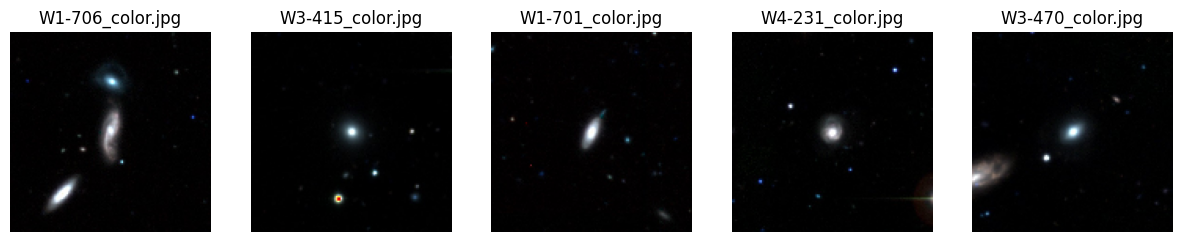

In [ ]:
from random import sample

# Mostrar imágenes aleatorias
sample_images = sample(image_files, 5)

plt.figure(figsize=(15, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(IMAGE_DIR, img_name)
    img = load_img(img_path, target_size=(128, 128))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Preprocesar imágenes
def preprocess_image(image_name, image_dir=IMAGE_DIR):
    img_path = os.path.join(image_dir, image_name)
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalizar
    return img_array

# Aplicar preprocesamiento a todas las imágenes
metadata['image_array'] = metadata['image_name'].apply(preprocess_image)

# Preprocesar metadatos (ejemplo)
scaler = StandardScaler()
metadata_scaled = scaler.fit_transform(metadata[['feature1', 'feature2']])  # Cambia por tus columnas reales
